### Xuhui Zhang - Personal Project

### Catalog

1. Dataset description
    1. Loading packages and dataset
2. Data Prepartion
    2. Basic summary of dataset
    2. Reformulate features
    2. Consistency Check
3. Data Visualization
    3. Pick-up and Drop-off location distribution
    3. Vendor id frequency
    3. pick-up and drop-off distribution
    1. passenger count distribution
    1. Monthly, daily and hourly distribution
    1. Trip duration distribution, distance distribution and speed distribution
    1. Relationship between number of passengers and trip duration
4. Classification
    1. Correlation heatmap
    4. Create dummy variables
    4. Split the dataset into train data and test data
    4. KNN Classification
5. Prediction
    5. Random Forest
    5. Naive Bayes
    5. Conclusion

In [45]:
# Loading library
library(dplyr)
library(lubridate)
library(data.table)
library(geosphere)
library(ggplot2)
library(gridExtra)
library(leaflet)
library(corrplot)
Sys.setlocale("LC_ALL","English")

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [62]:
library(caret)
library(klaR)

In [46]:
### Loading dataset
Taxi <- tbl_df(fread('Taxi.csv')) # Use fread function to increase the speed to load the large dataset, faster than read.csv

Read 1458644 rows and 11 (of 11) columns from 0.187 GB file in 00:00:17


In [7]:
column_names <- c('id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration')

column_explanation <- c('a unique identifier for each trip', 'a code indicating the provider associated with the trip record', 'date and time when the meter was engaged', 'date and time when the meter was disengaged', 'the number of passengers in the vehicle (driver entered value)', 'the longitude where the meter was engaged', 'the latitude where the meter was engaged', 'the longitude where the meter was disengaged', 'the latitude where the meter was disengaged', 'This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y = store and forward; N = not a store and forward trip', 'duration of the trip in seconds')

data_dictionary <- data.frame(column_names, column_explanation)
data_dictionary

column_names,column_explanation
id,a unique identifier for each trip
vendor_id,a code indicating the provider associated with the trip record
pickup_datetime,date and time when the meter was engaged
dropoff_datetime,date and time when the meter was disengaged
passenger_count,the number of passengers in the vehicle (driver entered value)
pickup_longitude,the longitude where the meter was engaged
pickup_latitude,the latitude where the meter was engaged
dropoff_longitude,the longitude where the meter was disengaged
dropoff_latitude,the latitude where the meter was disengaged
store_and_fwd_flag,This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y = store and forward; N = not a store and forward trip


# Data preparation

## Basic summary of dataset

In [8]:
class(Taxi)

[1] "tbl_df"     "tbl"        "data.frame"

In [9]:
glimpse(Taxi)

Observations: 1,458,644
Variables: 11
$ id                 <chr> "id2875421", "id2377394", "id3858529", "id350467...
$ vendor_id          <int> 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, ...
$ pickup_datetime    <chr> "2016-03-14 17:24:55", "2016-06-12 00:43:35", "2...
$ dropoff_datetime   <chr> "2016-03-14 17:32:30", "2016-06-12 00:54:38", "2...
$ passenger_count    <int> 1, 1, 1, 1, 1, 6, 4, 1, 1, 1, 1, 4, 2, 1, 1, 1, ...
$ pickup_longitude   <dbl> -73.98215, -73.98042, -73.97903, -74.01004, -73....
$ pickup_latitude    <dbl> 40.76794, 40.73856, 40.76394, 40.71997, 40.79321...
$ dropoff_longitude  <dbl> -73.96463, -73.99948, -74.00533, -74.01227, -73....
$ dropoff_latitude   <dbl> 40.76560, 40.73115, 40.71009, 40.70672, 40.78252...
$ store_and_fwd_flag <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N"...
$ trip_duration      <int> 455, 663, 2124, 429, 435, 443, 341, 1551, 255, 1...


In [10]:
summary(Taxi)

      id              vendor_id     pickup_datetime    dropoff_datetime  
 Length:1458644     Min.   :1.000   Length:1458644     Length:1458644    
 Class :character   1st Qu.:1.000   Class :character   Class :character  
 Mode  :character   Median :2.000   Mode  :character   Mode  :character  
                    Mean   :1.535                                        
                    3rd Qu.:2.000                                        
                    Max.   :2.000                                        
 passenger_count pickup_longitude  pickup_latitude dropoff_longitude
 Min.   :0.000   Min.   :-121.93   Min.   :34.36   Min.   :-121.93  
 1st Qu.:1.000   1st Qu.: -73.99   1st Qu.:40.74   1st Qu.: -73.99  
 Median :1.000   Median : -73.98   Median :40.75   Median : -73.98  
 Mean   :1.665   Mean   : -73.97   Mean   :40.75   Mean   : -73.97  
 3rd Qu.:2.000   3rd Qu.: -73.97   3rd Qu.:40.77   3rd Qu.: -73.96  
 Max.   :9.000   Max.   : -61.34   Max.   :51.88   Max.   : -61.34  

In [11]:
sum(is.na(Taxi)) # no NA value

[1] 0

## Reformulate features

In [47]:
### Transfer pickup_datetime and dropoff_datetime from chr to date, vendor_id and passenger_count from int to factor
Taxi$vendor_id <- factor(Taxi$vendor_id)
Taxi$pickup_datetime <- ymd_hms(Taxi$pickup_datetime)
Taxi$dropoff_datetime <- ymd_hms(Taxi$dropoff_datetime)
Taxi$passenger_count <- factor(Taxi$passenger_count)

In [48]:
### Extract weekday, month, hour from pickup_datetime
Taxi <- Taxi %>%
  mutate(weekday = wday(pickup_datetime),
         month = month(pickup_datetime),
         hour = hour(pickup_datetime))

In [50]:
### calculate distance between pickup_location and dropoff_location: miles
pickup_location <- Taxi %>%
  dplyr::select(pickup_longitude,pickup_latitude)

dropoff_location <- Taxi %>%
  dplyr::select(dropoff_longitude,dropoff_latitude)

Taxi <- Taxi %>%
  mutate(distance = distHaversine(pickup_location, dropoff_location)/(1000*1.6))

In [51]:
### Calculate the speed of taxi: miles/hour
Taxi <- Taxi %>%
  mutate(speed = distance/trip_duration*3600)

## Consistency Check

In [53]:
### check whether trip_duration = dropoff_datetime - pickup_datetime
Trip_duration_check <- Taxi %>%
  mutate(theoretical_trip_duration = abs(dropoff_datetime - pickup_datetime)) %>%
  mutate(theoretical_trip_duration = as.integer(theoretical_trip_duration)) %>%
  dplyr::select(trip_duration, theoretical_trip_duration) %>%
  mutate(check = identical(trip_duration, theoretical_trip_duration))
unique(Trip_duration_check$check)

[1] TRUE

# Data Visualization

## Pick-up and Drop-off location distribution

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Manhattan&zoom=12&size=640x640&scale=2&maptype=terrain&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manhattan&sensor=false
Warning message:
"Removed 286 rows containing missing values (geom_point)."

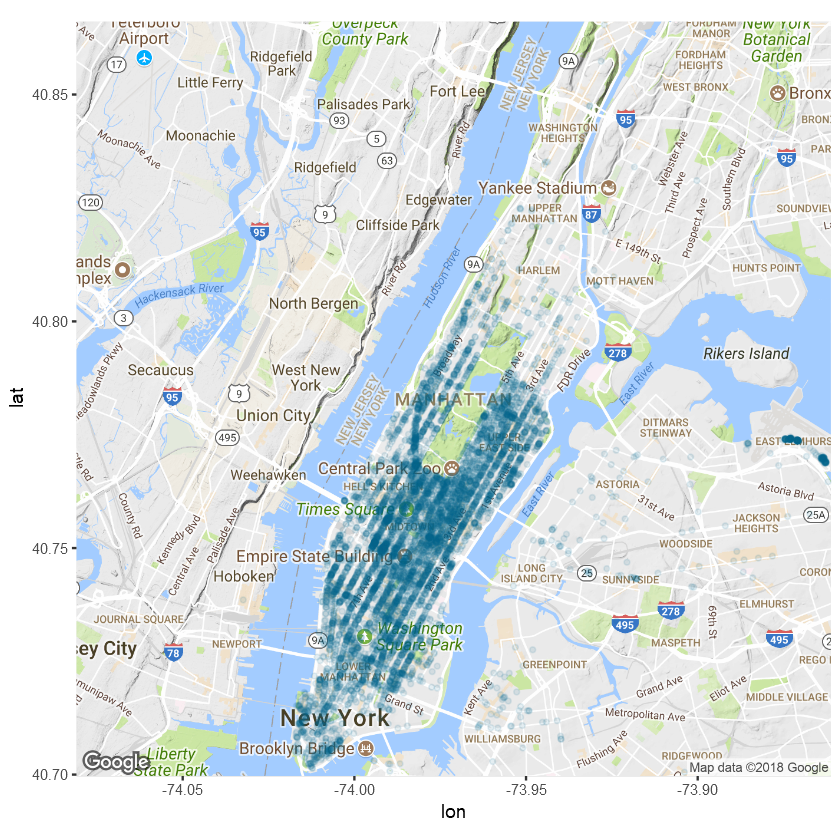

In [34]:
library(ggmap)
set.seed(1234)
get_googlemap("Manhattan",zoom = 12) %>% ggmap() +
    geom_point(aes(x = pickup_longitude, y = pickup_latitude),data = sample_n(Taxi, 8e3),alpha = 0.1, size = 1,color = "deepskyblue4")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Manhattan&zoom=12&size=640x640&scale=2&maptype=terrain&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manhattan&sensor=false
Warning message:
"Removed 470 rows containing missing values (geom_point)."

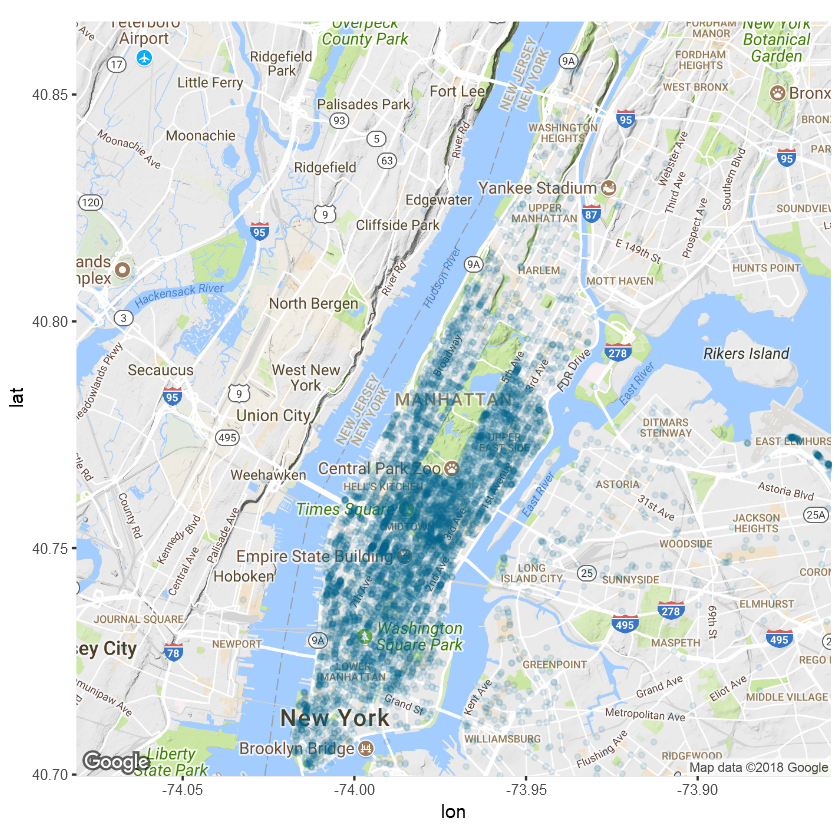

In [36]:
set.seed(1234)
get_googlemap("Manhattan",zoom = 12) %>% ggmap() +
    geom_point(aes(x = dropoff_longitude, y = dropoff_latitude),data = sample_n(Taxi, 8e3),alpha = 0.1, size = 1,color = "deepskyblue4")


In [18]:
dropoff_location <- leaflet(data = foo) %>% 
  addProviderTiles("Esri.NatGeoWorldMap") %>%
  addCircleMarkers(~ dropoff_longitude, ~dropoff_latitude, radius = 1,
                   color = "red", fillOpacity = 0.3)
dropoff_location

HTML widgets cannot be represented in plain text (need html)

## Vendor id frequency

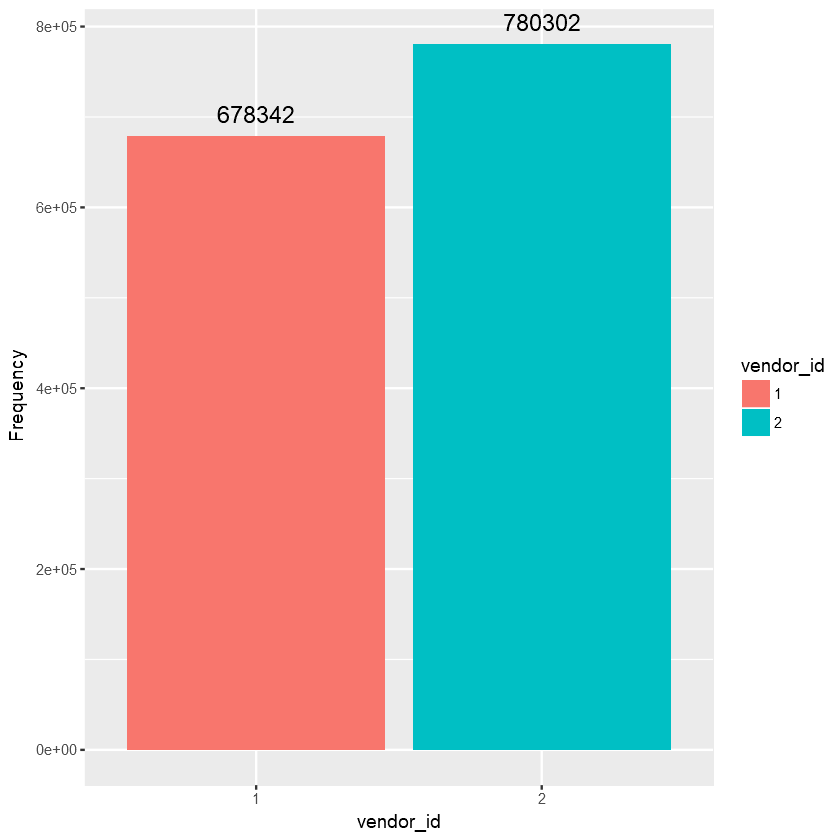

In [19]:
### vendor 2 has approximately 100,000 records more than vendor 1
Taxi_vendor <- Taxi %>%
  count(vendor_id)

Taxi_vendor %>%
  ggplot(aes(x = vendor_id, y = n, fill = vendor_id)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = n), vjust = -0.8, hjust = 0.5, size = 5) +
  ylab('Frequency')

## pick-up and drop-off distribution

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

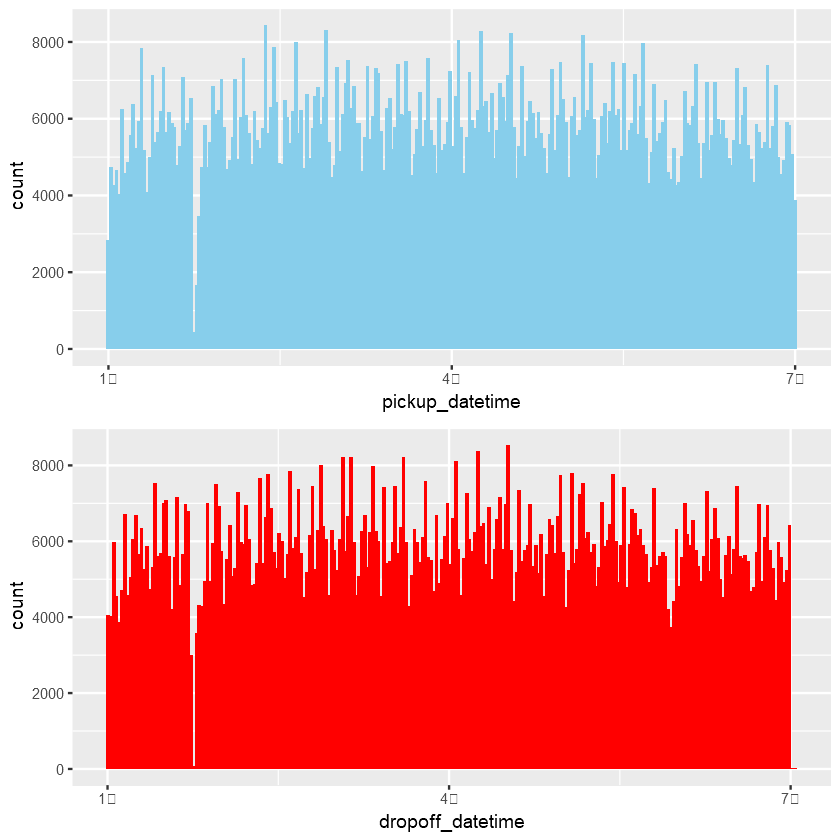

In [20]:
### All the Taxi records in the dataset are from Jan to Jun. Interesting drop from late Jan to early Feb: Blizzard of 2016 sits in the 3rd place for biggest snowstorm on record in Central Park at 25.1 inches.
pickup <- Taxi %>%
  ggplot(aes(pickup_datetime)) +
  geom_histogram(bins = 250,fill="skyblue")

dropoff <- Taxi %>%
  ggplot(aes(dropoff_datetime)) +
  geom_histogram(bins = 250,fill="red")

pickup_dropoff <- grid.arrange(pickup, dropoff, nrow = 2)
pickup_dropoff

## passenger count distribution

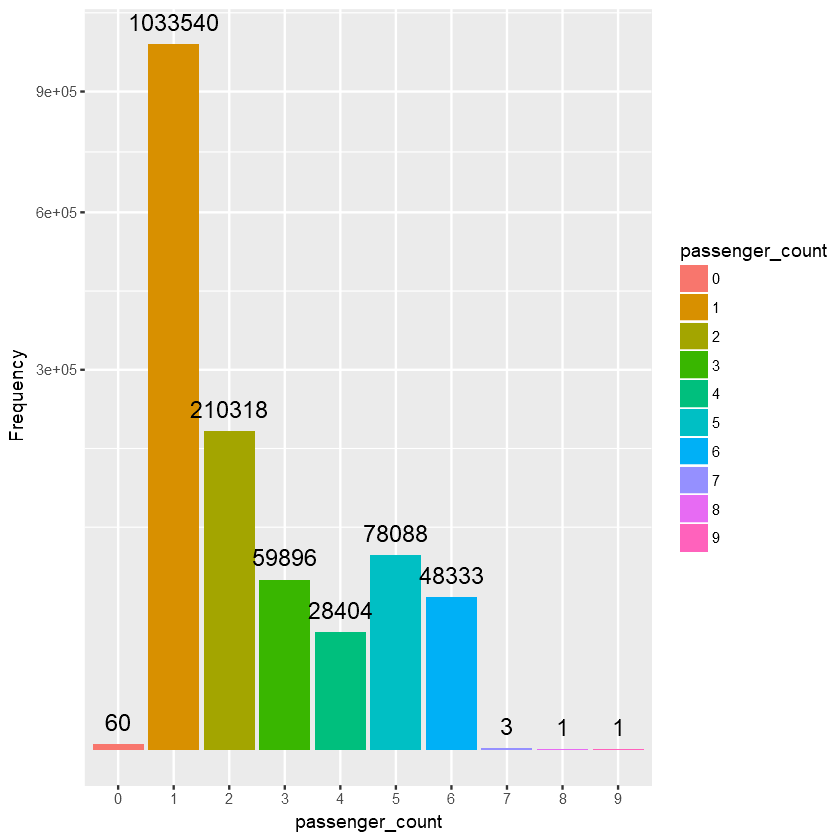

In [21]:
### One passenger covers nearly 2/3 records; Interesting result: 60 records show 0 passenger and is there any Taxi that has capacity for more than 4 passengers?
passenger <- Taxi %>%
  count(passenger_count)

passenger %>%
  ggplot(aes(x = passenger_count, y = n, fill = passenger_count)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = n), vjust = -0.8, hjust = 0.5, size = 5) +
  scale_y_sqrt() +
  ylab('Frequency')

## Monthly, daily and hourly distribution

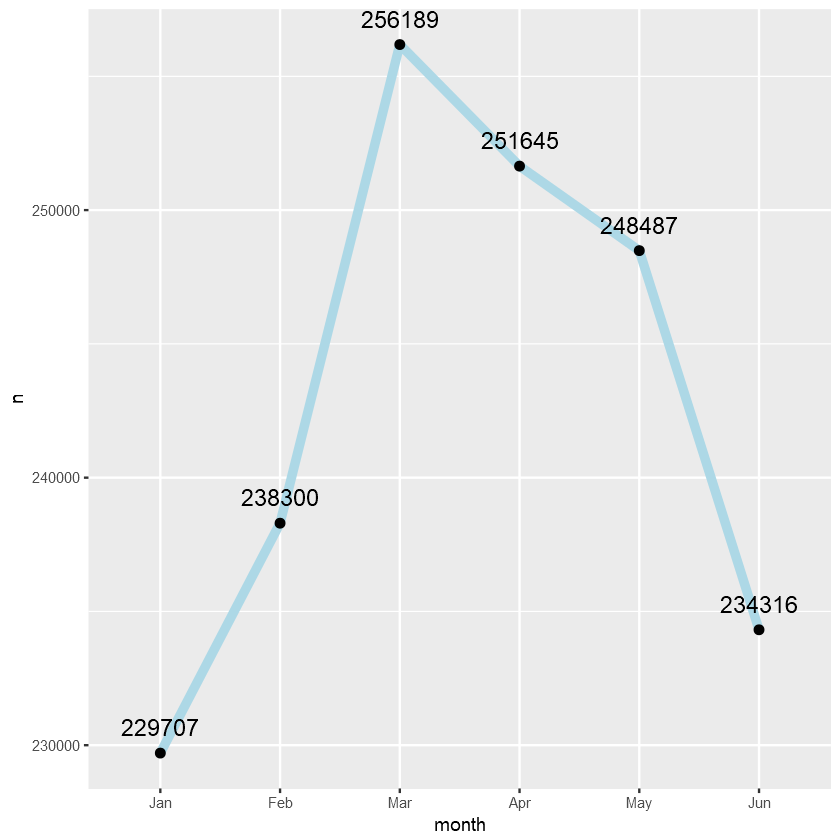

In [22]:
### Month distribution: Mar, Apr, May have most records. Maybe because of peak tourism seasons? 
Taxi$month = factor(
  Taxi$month, levels = 1:6,
  labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun"))

Taxi %>%
  group_by(month) %>%
  count() %>%
  ggplot(aes(month,n,group=1)) +
  geom_line(size=2,color="lightblue") +
  geom_point(size=2) +
  geom_text(aes(label = n), vjust = -1, hjust = 0.5, size = 5)

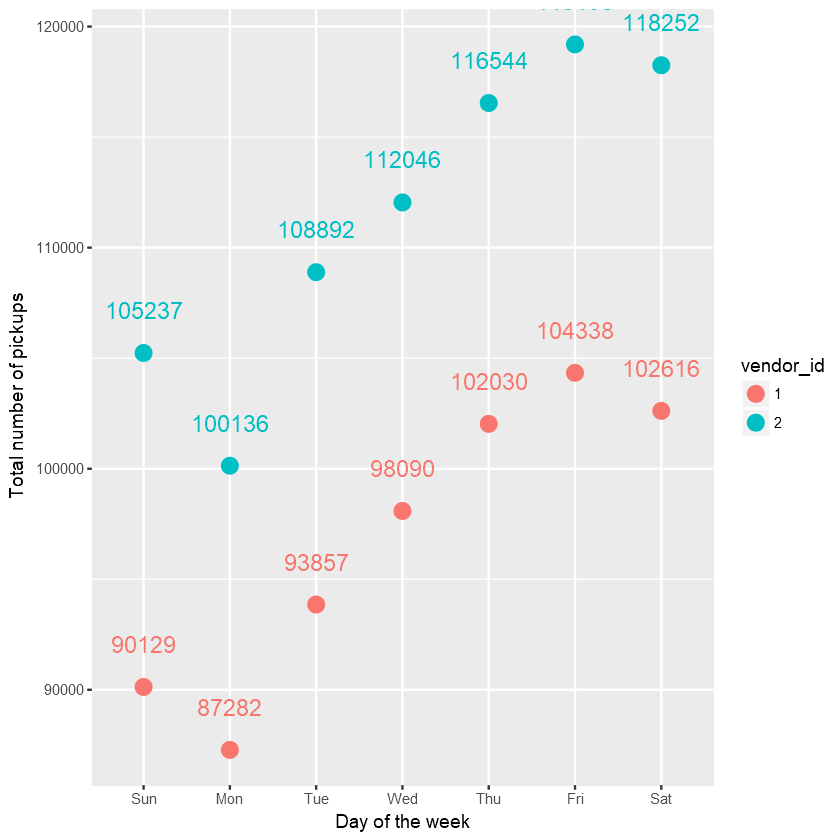

In [23]:
### Day distribution: Monday is the lowest point throughout the whole week for both vendor 1 and vendor 2. Increase on Weekday, peaking at Friday and decrease on weekend
Taxi$weekday = factor(
  Taxi$weekday, levels = 1:7,
  labels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))

Taxi %>%
  group_by(weekday, vendor_id) %>%
  count() %>%
  ggplot(aes(weekday, n, colour = vendor_id)) +
  geom_point(size = 4) +
  labs(x = "Day of the week", y = "Total number of pickups") +
  geom_text(aes(label = n), vjust = -2, hjust = 0.5, size = 5)

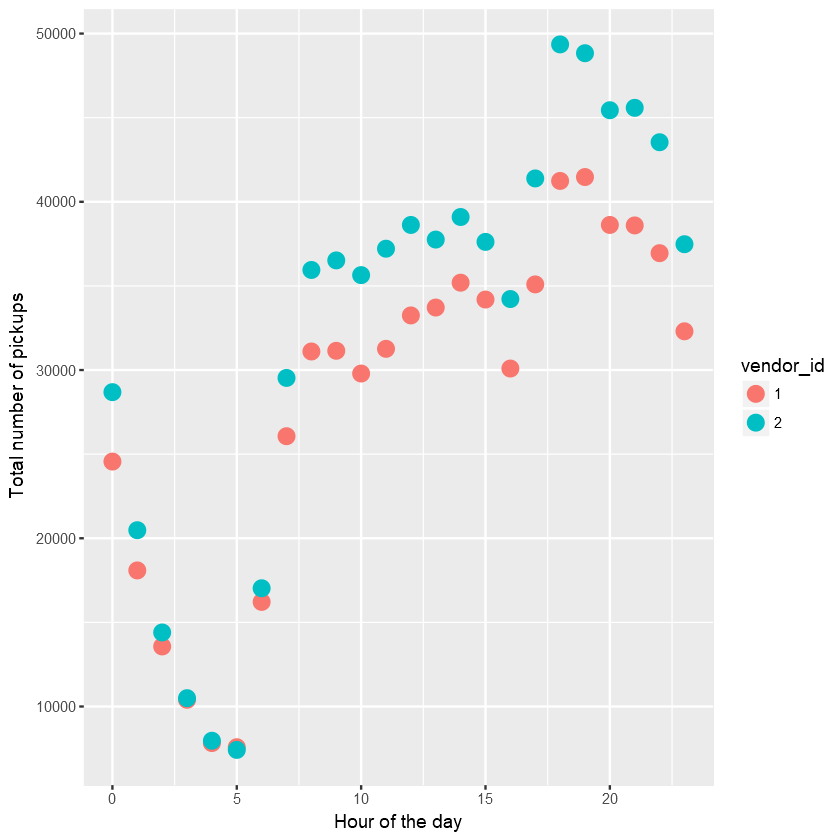

In [24]:
### Hour distribution: Peak at 6pm: rushing hours; bottom at 5 am: shift
Taxi %>%
  group_by(hour, vendor_id) %>%
  count() %>%
  ggplot(aes(hour, n, color = vendor_id)) +
  geom_point(size = 4) +
  labs(x = "Hour of the day", y = "Total number of pickups")

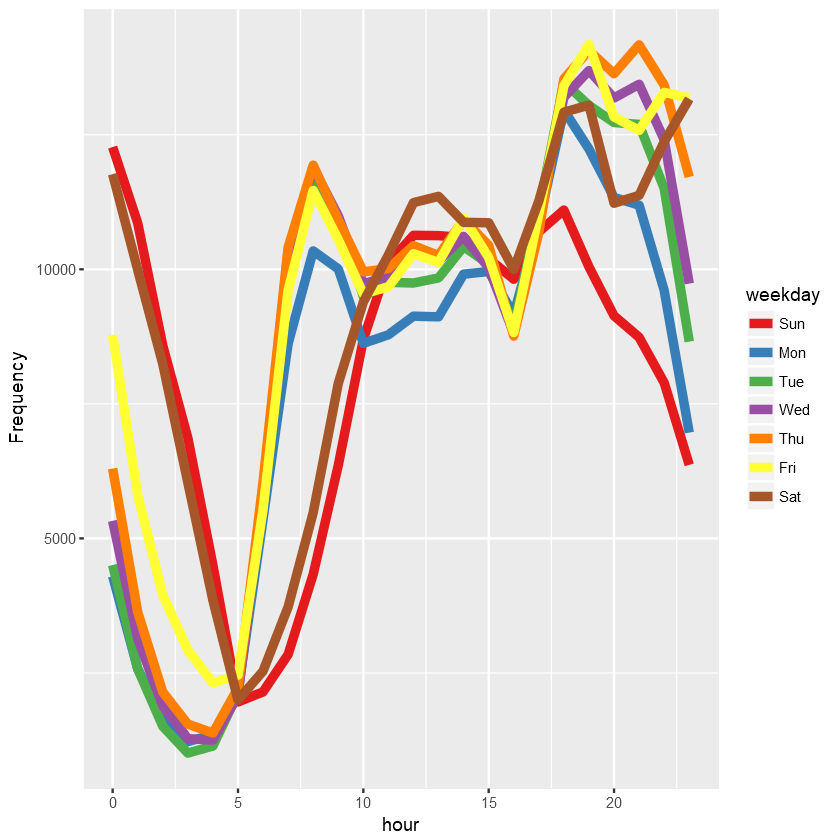

In [25]:
### At the early morning of Sunday and Saturday, more people will call Taxi --> happy hour or have party; More people will call Taxi on weekday mornings than weekend mornings --> commute
Taxi %>%
  group_by(weekday,hour) %>%
  count() %>%
  ggplot(aes(hour,n,color = weekday)) +
  geom_line(size=2) +
  scale_color_brewer(palette = "Set1") +
  ylab('Frequency')

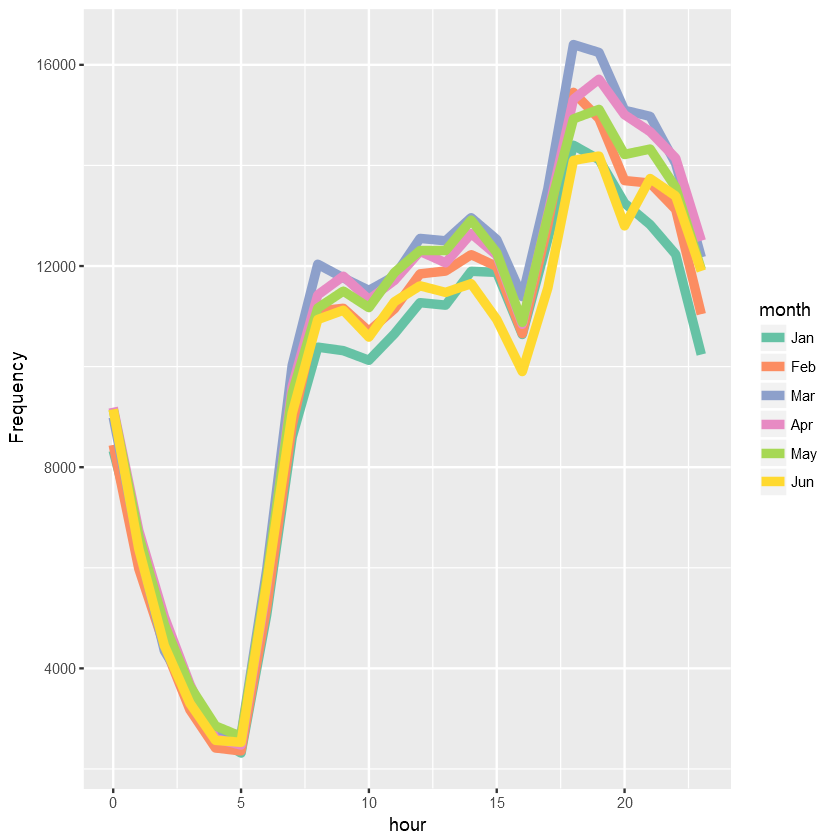

In [26]:
### More people will call Taxi at March --> Spring Break?
Taxi %>%
  group_by(month,hour) %>%
  count() %>%
  ggplot(aes(hour,n,color=month)) +
  geom_line(size=2) +
  scale_color_brewer(palette = "Set2") +
  ylab('Frequency')

## Trip duration distribution, distance distribution and speed distribution

TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

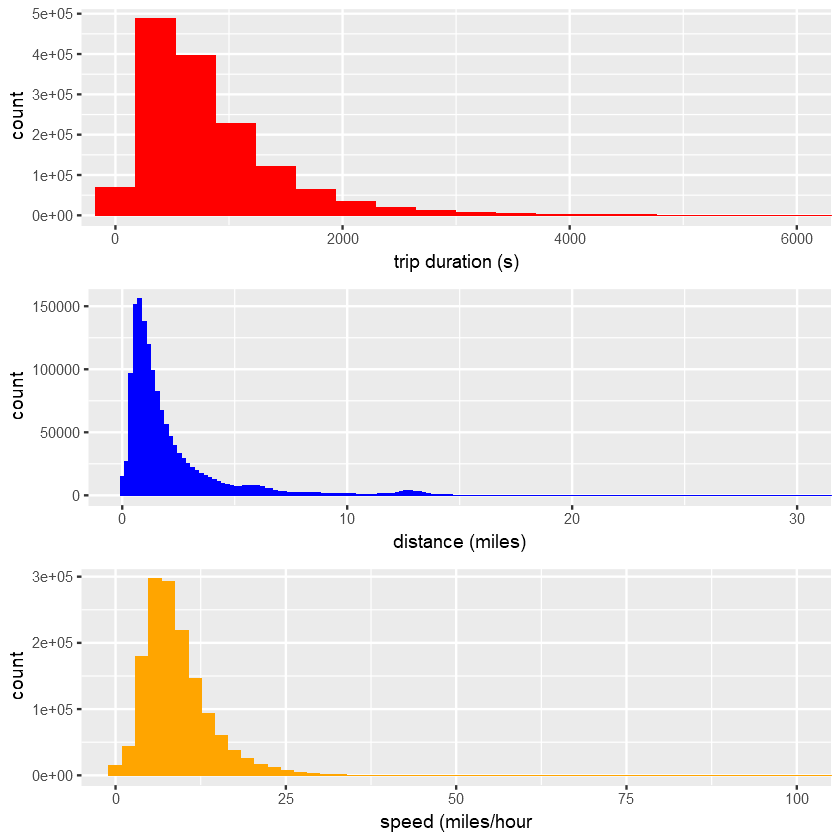

In [27]:
### Most trips range from 8 mins to 15 mins
duration_distribution <- Taxi %>%
  ggplot(aes(trip_duration)) +
  geom_histogram(bins = 10000, fill = "red") + 
  coord_cartesian(x = c(1, 6000)) + 
  xlab('trip duration (s)')

### 1 to 2 miles are most common
distance_distribution <- Taxi %>%
  ggplot(aes(distance)) +
  geom_histogram(bins = 4000,fill = "blue") +
  coord_cartesian(x = c(0,30)) +
  xlab('distance (miles)')

### 8 - 10 miles / hour: traffic during rushing hours
speed_distribution <- Taxi %>%
  ggplot(aes(speed)) +
  geom_histogram(bins = 3000, fill = "orange") +
  coord_cartesian(x = c(0,100)) +
  xlab('speed (miles/hour')

duration_distance_speed_distribution <- grid.arrange(duration_distribution, distance_distribution, speed_distribution, nrow = 3)
duration_distance_speed_distribution

## Relationship between number of passengers and trip duration

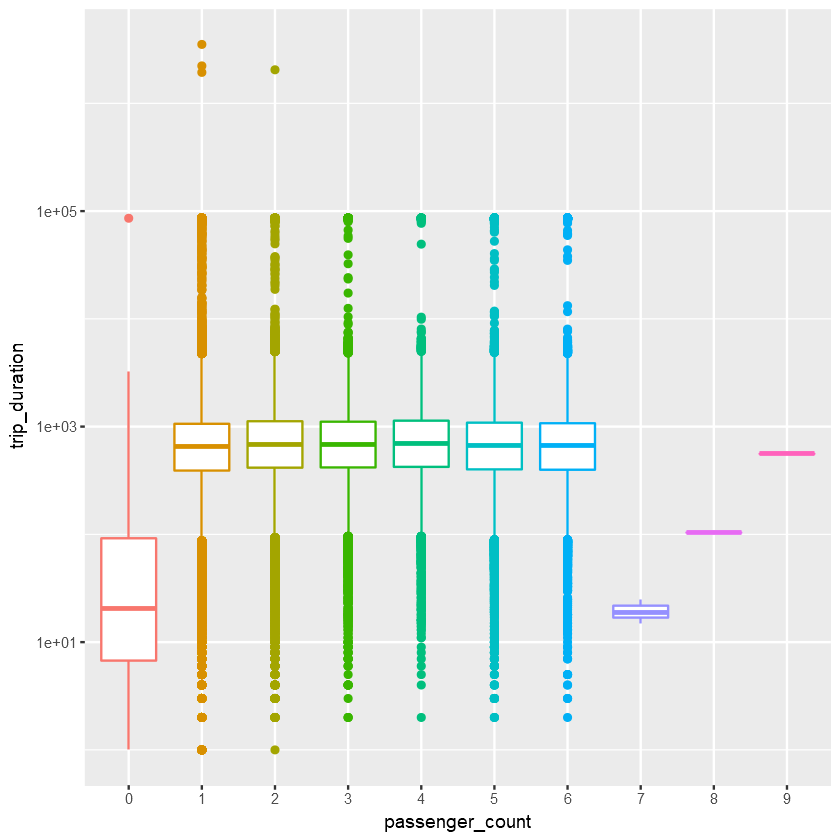

In [28]:
### It seems that there is no direct relationship between number of passengers and trip duration
Taxi %>%
ggplot(aes(passenger_count,trip_duration,color = passenger_count)) +
  geom_boxplot() +
  scale_y_log10() +
  theme(legend.position = "null")

# Classification

## Correlation heatmap

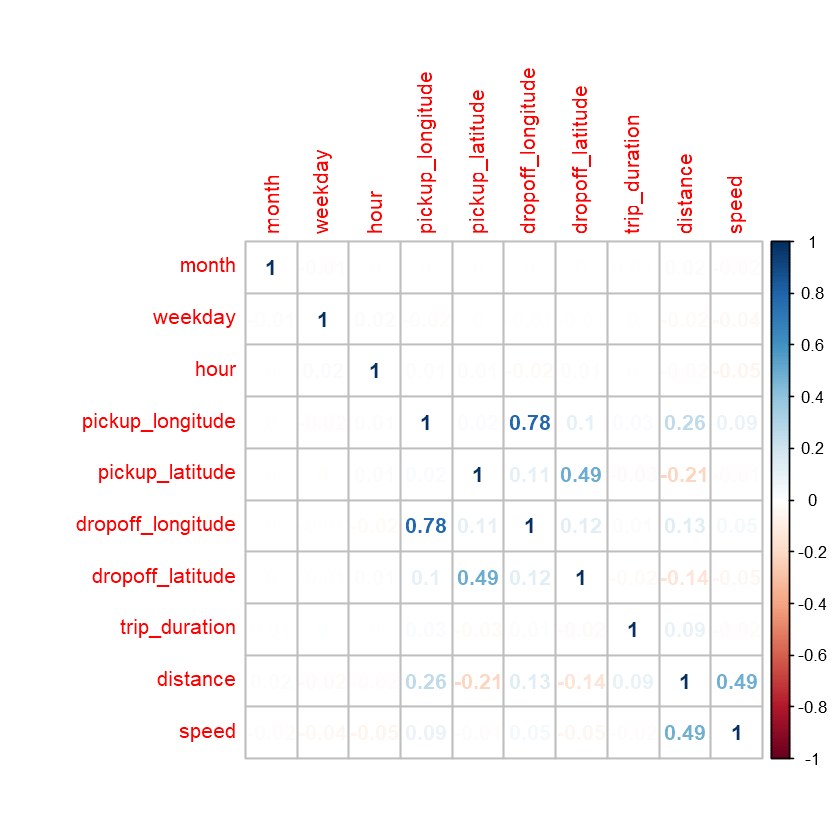

In [37]:
Taxi_heatmap <- Taxi %>%
  select(month, weekday, hour, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_duration, distance, speed)
cor_taxi <- cor(Taxi_heatmap)
corrplot(cor_taxi, method = 'number')

## Create dummy variables

In [55]:
trip_duration_group <- Taxi %>%
  mutate(duration_group = case_when(trip_duration < 3e2 ~ "Fast",
                            trip_duration >= 3e2 & trip_duration <= 1.6e3 ~ "Mid",
                            trip_duration > 1.6e3 ~ "Slow"))

In [57]:
dataset <- trip_duration_group %>% 
  dplyr::select(month, hour, distance, duration_group) %>% 
  filter(row_number() <= 10000)

dataset <- dataset %>% mutate(duration_group = as.factor(duration_group))

## Split the dataset into train data and test data

In [58]:
### Split the dataset into train data and test data
set.seed(1234)
trainIndex <- createDataPartition(dataset$duration_group, p = .8, 
                                  list = FALSE, 
                                  times = 1)
train <- dataset[trainIndex,]
test <- dataset[-trainIndex,]

## KNN Classification

In [60]:
grid <- expand.grid(k = c(5,10,15))

# Control
ctrl <- trainControl(method = "cv",number = 2, p = 0.8)

knn.md <- train(duration_group ~ ., data = train, method = "knn",metric = "Kappa",trControl = ctrl, tuneGrid = grid)

# Prediction
knn.md.result <- predict(knn.md, newdata = test)

# Result: Accuracy: 0.8044
confusionMatrix(knn.md.result,test$duration_group)

Confusion Matrix and Statistics

          Reference
Prediction Fast  Mid Slow
      Fast  151  111    3
      Mid   150 1348   92
      Slow    0   36  108

Overall Statistics
                                          
               Accuracy : 0.8039          
                 95% CI : (0.7858, 0.8211)
    No Information Rate : 0.7479          
    P-Value [Acc > NIR] : 1.845e-09       
                                          
                  Kappa : 0.481           
 Mcnemar's Test P-Value : 2.747e-07       

Statistics by Class:

                     Class: Fast Class: Mid Class: Slow
Sensitivity              0.50166     0.9017     0.53202
Specificity              0.93286     0.5198     0.97996
Pos Pred Value           0.56981     0.8478     0.75000
Neg Pred Value           0.91349     0.6406     0.94879
Prevalence               0.15058     0.7479     0.10155
Detection Rate           0.07554     0.6743     0.05403
Detection Prevalence     0.13257     0.7954     0.07204
Balanced

# Prediction

## Random Forest

In [46]:
grid.rf = expand.grid(mtry = c(10,50,100))

rf.md <- train(duration_group ~ ., data = train, method = "rf", metric = "Kappa", trControl = ctrl, tuneGrid = grid.rf)

rf.md.result <- predict(rf.md,newdata = test)

confusionMatrix(rf.md.result,test$duration_group)

Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"

Confusion Matrix and Statistics

          Reference
Prediction Fast  Mid Slow
      Fast  162  100    3
      Mid   139 1342   97
      Slow    0   53  103

Overall Statistics
                                          
               Accuracy : 0.8039          
                 95% CI : (0.7858, 0.8211)
    No Information Rate : 0.7479          
    P-Value [Acc > NIR] : 1.845e-09       
                                          
                  Kappa : 0.4863          
 Mcnemar's Test P-Value : 5.730e-05       

Statistics by Class:

                     Class: Fast Class: Mid Class: Slow
Sensitivity              0.53821     0.8977     0.50739
Specificity              0.93934     0.5317     0.97049
Pos Pred Value           0.61132     0.8504     0.66026
Neg Pred Value           0.91984     0.6366     0.94574
Prevalence               0.15058     0.7479     0.10155
Detection Rate           0.08104     0.6713     0.05153
Detection Prevalence     0.13257     0.7894     0.07804
Balanced

## Naive Bayes

In [61]:
grid.nb = expand.grid(fL = 0, usekernel = FALSE, adjust = 1)

nb.md <- train(duration_group ~ ., data = train, method = "nb", metric = 'Kappa', trControl = ctrl, tuneGrid = grid.nb)

nb.md.result <- predict(nb.md,newdata = test)

confusionMatrix(nb.md.result,test$duration_group)

Confusion Matrix and Statistics

          Reference
Prediction Fast  Mid Slow
      Fast  214  248    2
      Mid    87 1209   97
      Slow    0   38  104

Overall Statistics
                                          
               Accuracy : 0.7639          
                 95% CI : (0.7446, 0.7824)
    No Information Rate : 0.7479          
    P-Value [Acc > NIR] : 0.05158         
                                          
                  Kappa : 0.4593          
 Mcnemar's Test P-Value : < 2e-16         

Statistics by Class:

                     Class: Fast Class: Mid Class: Slow
Sensitivity               0.7110     0.8087     0.51232
Specificity               0.8528     0.6349     0.97884
Pos Pred Value            0.4612     0.8679     0.73239
Neg Pred Value            0.9433     0.5281     0.94669
Prevalence                0.1506     0.7479     0.10155
Detection Rate            0.1071     0.6048     0.05203
Detection Prevalence      0.2321     0.6968     0.07104
Balanced

## Conclusion of three prediction models

In [50]:
knn <- 0.8044
rf <- 0.8039
nb <- 0.7639
conclusion <- t(data.frame(knn,rf,nb))
colnames(conclusion) <- 'Accuracy Score'
conclusion

,Accuracy Score
knn,0.8044
rf,0.8039
nb,0.7639


# Reference

https://www.kaggle.com/headsortails/nyc-taxi-eda-update-the-fast-the-curious

https://github.com/gaorongchao/R_Graphics_Cookbook